## Star Wars survey analysis
This is an analysis on Star Wars Episodes based on a [survey conducted by FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey) via SurveyMonkey.

Exploration addresses following questions:

- Ultimately: What is the best Star Wars Episode?
- Does ranking and view count relate to different groups of people: gender, age, fans or non-fans? And how does it relate?

Which episode is the best of the best? - Find out!

### Prepare Data

In [1]:
import pandas as pd
star_wars = pd.read_csv("starwars/star_wars.csv", encoding="ISO-8859-1")
star_wars = star_wars[~star_wars['RespondentID'].isnull()]
star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


#### Convert columns
Convert certain columns to boolean series, using `map()` function

In [2]:
columns=['Have you seen any of the 6 films in the Star Wars franchise?',
         'Do you consider yourself to be a fan of the Star Wars film franchise?']

yes_no = {
    "Yes": True,
    "No": False
}

for column in columns:
    star_wars[column] = star_wars[column].map(yes_no)

The next six columns represent a single checkbox question. The respondent checked off a series of boxes in response to the question, *Which of the following Star Wars films have you seen? Please select all that apply.*

The columns for this question are:

- Which of the following Star Wars films have you seen? Please select all that apply. - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
- Unnamed: 4 - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
- Unnamed: 5 - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
- Unnamed: 6 - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
- Unnamed: 7 - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
- Unnamed: 8 - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

For this exploration, we'll convert values of those columns to `True/False`, and rename the columns to `seen_1, seen_2, seen_3,` etc..

In [3]:
import numpy as np
columns = ['Which of the following Star Wars films have you seen? Please select all that apply.',
           'Unnamed: 4',
           'Unnamed: 5',
          'Unnamed: 6',
          'Unnamed: 7',
          'Unnamed: 8']

for ind, column in enumerate(columns):
    col_value = star_wars[column].value_counts().index.values[0]
    true_false = {col_value: True, np.NAN: False}
    new_col_name = 'seen_'+str(ind+1)
    
    star_wars[column] = star_wars[column].map(true_false)
    star_wars.rename(columns={column:new_col_name}, inplace=True)

star_wars.head(2)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,seen_1,seen_2,seen_3,seen_4,seen_5,seen_6,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
1,3.292880e+09,True,True,True,True,True,True,True,True,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,False,NaN,False,False,False,False,False,False,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central


Convert columns 9:15 which represent film rank to numeric, then rename.

In [4]:
# Convert columns to numeric
star_wars[star_wars.columns[9:15]] = star_wars[star_wars.columns[9:15]].astype(float)

# Renaming columns
columns = star_wars.columns[9:15].values 
for ind, column in enumerate(columns):
    new_col_name = 'ranking_'+str(ind+1)
    star_wars.rename(columns={column:new_col_name}, inplace=True)

# Print to ensure on the result
#star_wars[star_wars.columns[9:15]].head(5)

### Plotting out film ranks
Lets build a barchart for movie ranks based on survey.
The lower the value, the better the rank, so, let's invert values. Since max is 6, let's substract values from 6. And then plot!

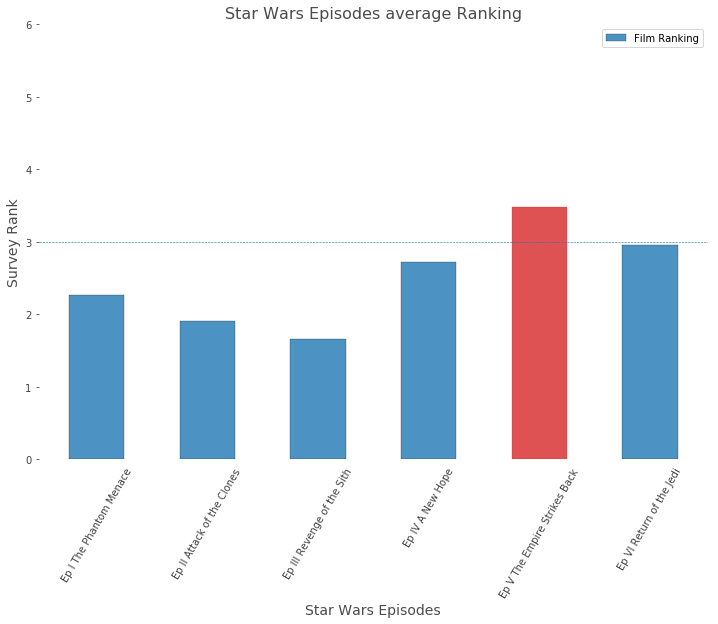

In [158]:
import matplotlib.pyplot as plt

# Define variables
def plot_ranks(df):
    star_wars_df = df
    colname_list_ranks = star_wars_df.columns[9:15]
    star_wars_ranks = 6-star_wars_df[colname_list_ranks].mean()

    ind = np.arange(6)
    width = 0.5

    # Barplots
    fig, ax = plt.subplots(figsize=(12,8))

    bars = ax.bar(ind, star_wars_ranks, width, linewidth = 0.3, edgecolor='black', alpha = 0.8, label='Film Ranking')

    # Improve Aesthetics
    ax.axhline(3, lw=0.6, linestyle='--')

    ax.set_title('Star Wars Episodes average Ranking', alpha=0.7, fontsize=16)
    ax.set_ylim(0, 6)
    ax.set_ylabel('Survey Rank', alpha = 0.7, fontsize=14)
    ax.set_xlabel('Star Wars Episodes', alpha = 0.7, fontsize=14)
    ax.set_xticks(ind)
    ax.set_xticklabels(['Ep I The Phantom Menace',
                        'Ep II Attack of the Clones',
                        'Ep III Revenge of the Sith',
                        'Ep IV A New Hope',
                        'Ep V The Empire Strikes Back',
                        'Ep VI Return of the Jedi'], rotation=60)

    ax.tick_params(axis='both', top='off', bottom='off', left='on', right='off',
                   labelleft='on', labelbottom='on',
                   color='#404040',
                   labelcolor='#404040')
    for i,spine in enumerate(ax.spines.values()):
        spine.set_visible(False)

    ax.legend();

    #Set best scoring movie to red
    nice_red = (214/255,39/255,40/255)
    bars[4].set_color(nice_red)

    plt.show()
    
plot_ranks(star_wars)

Great! So far we've cleared the dataset: dropped out records with null ids, convert some columns to numeric, renamed columns, converted columns (have you seen all 6 movies, are you a fan, have you seen each movie) to True and False

### Findings
*Episode V The Empire Strikes Back* turns out to be the best according to the Survey. The follow-up is * Episode VI Return of the Jedi*.

**So, why Episode V, which is has been created in 1980 turns out to have highest rank?** Presumption: maybe because older people are fond of Star Wars most of all. And moreover they remember that marvel feel, when the episode appeared on screens. For younger generation StarWars probably more or less blend in with all other versatile blockbusters. So they do not even distinguish Star Wars as some pecial movie.
Simply because the survey was answered by those who watched it - which is probably a fan

In practice maybe because:
 - age of survey participants is relatively old
 - high percentage of fans
 - There is a good chance that someone who watched all 6 episodes is a fan. And most probably of older age.
 - Check ranks if young people <30 that watched all 6 films

### How many times each film been seen?

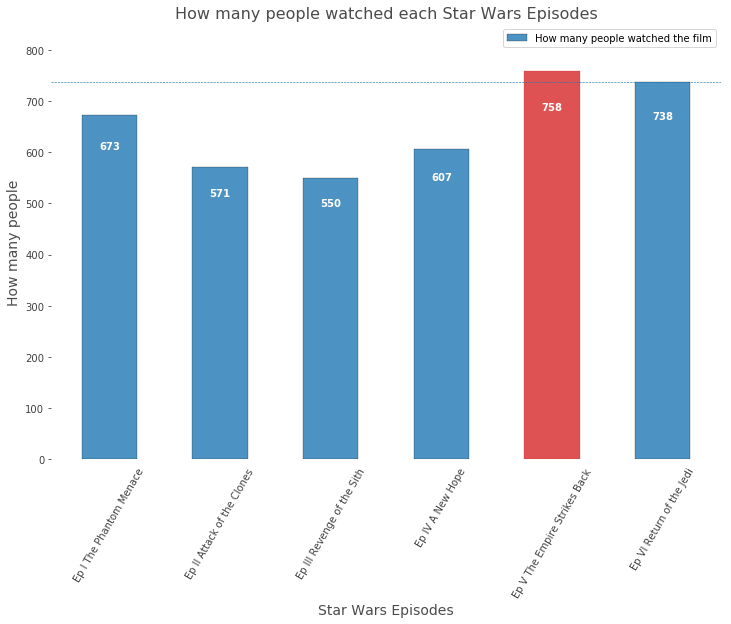

In [57]:
def plot_views(df):
    star_wars_df = df
    column_list = []
    for colname in star_wars_df.columns.values:
        if 'seen_' in colname:
            column_list.append(colname)

    #Set up variables
    width=0.5
    ind = np.arange(6)
    number_watched = star_wars_df[column_list].sum();

    fig, ax = plt.subplots(figsize=(12,8))
    bars = ax.bar(ind, number_watched, width, linewidth = 0.3, edgecolor='black', alpha = 0.8, label='How many people watched the film')
    # Improve Aesthetics
    ax.axhline(738, lw=0.6, linestyle='--')

    ax.set_title('How many people watched each Star Wars Episodes', alpha=0.7, fontsize=16)
    ax.set_ylim(0, 850)
    ax.set_ylabel('How many people', alpha = 0.7, fontsize=14)
    ax.set_xlabel('Star Wars Episodes', alpha = 0.7, fontsize=14)
    ax.set_xticks(ind)
    ax.set_xticklabels(['Ep I The Phantom Menace',
                        'Ep II Attack of the Clones',
                        'Ep III Revenge of the Sith',
                        'Ep IV A New Hope',
                        'Ep V The Empire Strikes Back',
                        'Ep VI Return of the Jedi'], rotation=60)

    ax.tick_params(axis='both', top='off', bottom='off', left='on', right='off',
                   labelleft='on', labelbottom='on',
                   color='#404040',
                   labelcolor='#404040')
    for i,spine in enumerate(ax.spines.values()):
        spine.set_visible(False)

    ax.legend();

    #Set best scoring movie to red
    nice_red = (214/255,39/255,40/255)
    bars[4].set_color(nice_red)

    ### Adding values atop the bars:
    for bar in bars:
        height = bar.get_height()
        #print(height)
        ax.text(bar.get_x() + bar.get_width()/2, (height-height*0.1), int(height), 
                     ha='center', color='white', fontsize=10, alpha=1, fontweight='bold')

    plt.show()
    
plot_views(star_wars)

### Findings

Surprisingly Episode V The Empire Strikes Back episode been watched by the largest number of people.

Presumptions:
- That could indirectly indicate that surveyors are of an older age group.
- Empire Strikes Back is indeed so good, that it has higher number of views.

## Explore ranks and views for different groups
Lets see how ranks and views change and correlate for different groups of survey participants.

Group examples to consider
- Do you consider yourself to be a fan of the Star Wars film franchise? - True or False
- Do you consider yourself to be a fan of the Star Trek franchise? - Yes or No
- Gender - Male or Female
- Age - 18-29, 30-44, 45-60, > 60


### Gender-wise exploration
Let's see opinion of man and women rank-wise.

First ensure on gender distribution

In [62]:
star_wars['Gender'].value_counts()

Female    549
Male      497
Name: Gender, dtype: int64

Ok, there were approximately equal number of females and males in the survey

Now compare females and males rank of the episodes

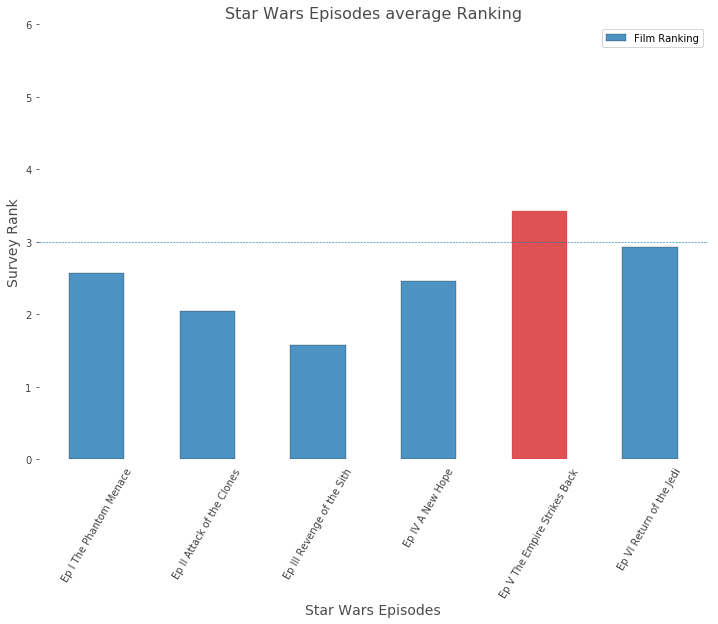

In [60]:
### Gender-wise exploration
star_wars_female = star_wars[star_wars['Gender']=='Female']
star_wars_male = star_wars[star_wars['Gender']=='Male']

plot_ranks(star_wars_female)

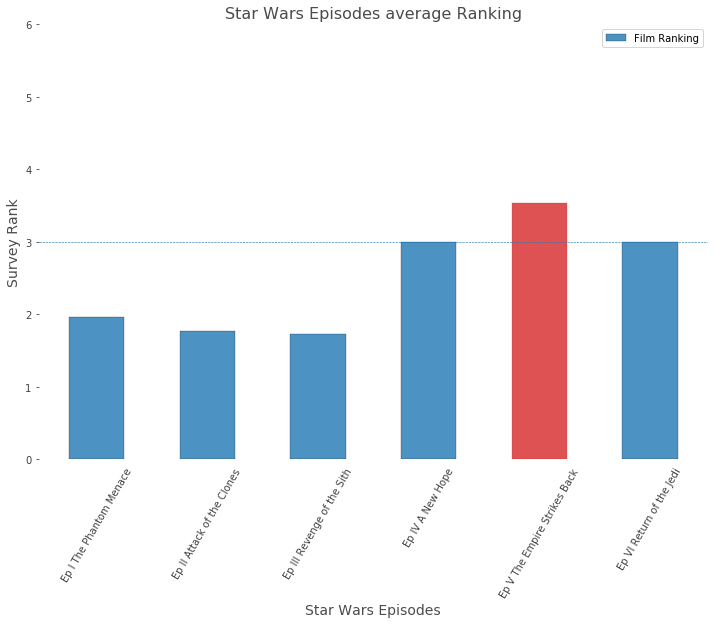

In [61]:
plot_ranks(star_wars_male)

Results are similar: both groups consider Episode V The Empire Strikes Back to be the best.
    
For further explorations we won't break dataset for females/males.

### Fan-wise exploration
Let's explore fans and non-fans opinion on the StarWars episodes.

First, let's see the distribution of fans:

In [66]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts()

True     552
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

In [ ]:
There is considerable amount of non-fans.

In [67]:
star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'].value_counts()

No     641
Yes    427
Name: Do you consider yourself to be a fan of the Star Trek franchise?, dtype: int64

Let's see the view rate and ranks among Fans and Non-Fans.

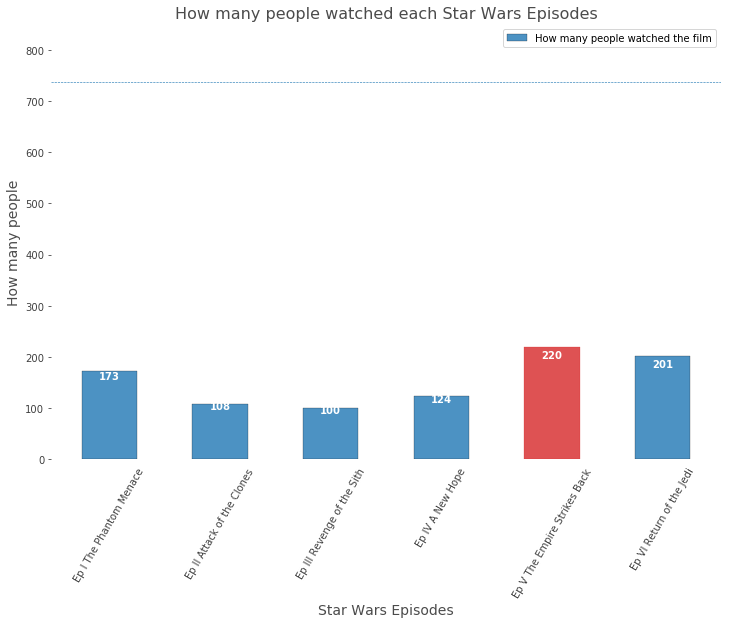

In [77]:
star_wars_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True]
star_wars_non_fans = star_wars[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==False]

plot_views(star_wars_non_fans)

Surprisingly non-fans viewed Episode V most of all.

Let's see ranks.

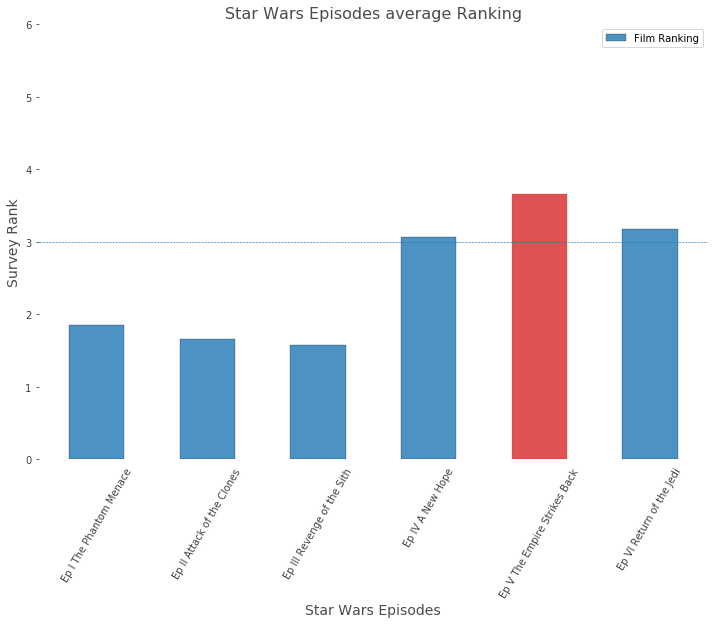

In [91]:
plot_ranks(star_wars_fans)

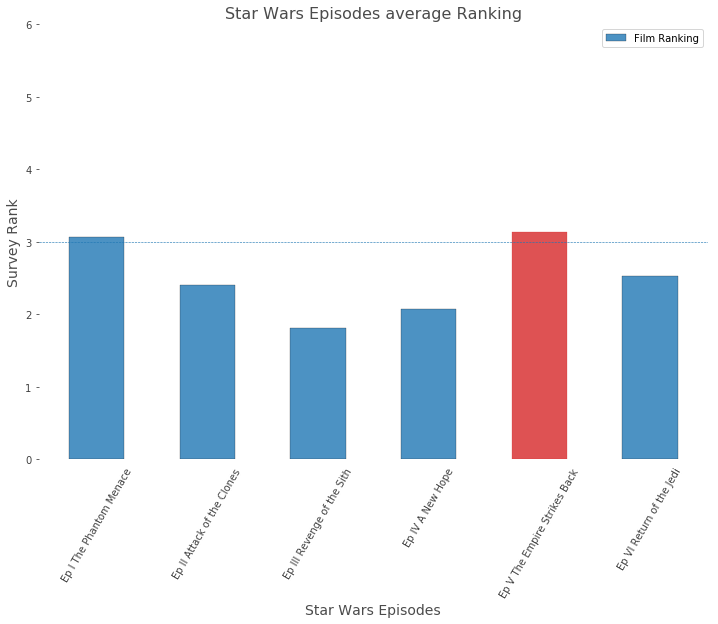

In [92]:
plot_ranks(star_wars_non_fans)

Both groups: fans and non-fans consider Episode V The Empire Strikes Back to be the best.

Runner-up inclination for non-fans is Episode I - the Phantom Menace - the latest film. While fans see Return of the Jedi to be second-best episode.

### Star Wars episdes by Age Groups
Let's explore how people of different age rank Star Wars episodes.

Initial assumption: Since episode V been produced in 1980, only older generation would rank it the best. Younger people would probably vote for Phantom or for Return of the Jedi.

First, display distribution:

In [ ]:
star_wars['Age'].value_counts()

In [156]:
colname_list_ranks = star_wars.columns[9:15]
collist = list(colname_list_ranks)
collist.append('Age')

star_wars_ranking = star_wars[collist]
star_wars_ranks_by_age = 6-star_wars_ranking.groupby('Age').agg(np.mean)
star_wars_ranks_by_age

,ranking_1,ranking_2,ranking_3,ranking_4,ranking_5,ranking_6
Age,,,,,,
18-29,1.900000,1.900000,2.033333,3.005556,3.277778,2.883333
30-44,1.652174,1.690821,1.524272,3.067633,3.787440,3.285024
45-60,2.458333,1.829167,1.462500,2.691667,3.562500,2.995833
> 60,2.989583,2.238342,1.683938,2.191710,3.269430,2.642487


Ok, rank dataframe built for each group.

Now building comparison barchart.

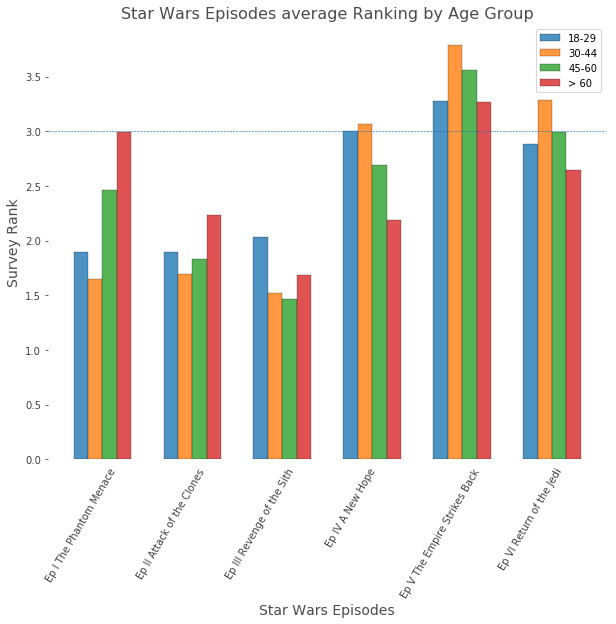

In [155]:
# Define Variables
age_groups = list(star_wars_ranks_by_age.index.values)
ind = np.arange(0,15,2.5)
width = 0.4

# Barplots
fig, ax = plt.subplots(figsize=(10,8))
for i, group in enumerate(age_groups):
    ax.bar(ind+width*i, star_wars_ranks_by_age.loc[group], width, linewidth = 0.3, edgecolor='black', alpha = 0.8, label=group);
    
# Improve Aesthetics
ax.axhline(3, lw=0.6, linestyle='--')

ax.set_title('Star Wars Episodes average Ranking by Age Group', alpha=0.7, fontsize=16)
#ax.set_ylim(0, 6)
ax.set_ylabel('Survey Rank', alpha = 0.7, fontsize=14)
ax.set_xlabel('Star Wars Episodes', alpha = 0.7, fontsize=14)
ax.set_xticks(ind)
ax.set_xticklabels(['Ep I The Phantom Menace',
                    'Ep II Attack of the Clones',
                    'Ep III Revenge of the Sith',
                    'Ep IV A New Hope',
                    'Ep V The Empire Strikes Back',
                    'Ep VI Return of the Jedi'], rotation=60)

ax.tick_params(axis='both', top='off', bottom='off', left='on', right='off',
               labelleft='on', labelbottom='on',
               color='#404040',
               labelcolor='#404040')
for i,spine in enumerate(ax.spines.values()):
    spine.set_visible(False)

ax.legend();

#Set best scoring movie to red
nice_red = (214/255,39/255,40/255)
bars[4].set_color(nice_red)

plt.show()


### Findings

Absolutely surprising, that among all groups (gender-wise, fan and non-fans, all ages) *Episode V The Empire Strikes Back* is assumed the best!

There is also a strong correlation for views and rank of the episodes.

Runner-up Episode slightly vary. What's common is that non-fans and eldest people considered Phantom Menace as a 2-nd best movie.